In [1]:
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
import altair as alt

In [2]:
team_files = [
    "AC_Milan.csv", "AS_Roma.csv", "Atalanta.csv", "Bologna.csv", "Cagliari.csv",
    "Como.csv", "Empoli.csv", "Fiorentina.csv", "Genoa.csv", "Hellas_Verona.csv",
    "Inter_Milan.csv", "Juventus.csv", "Lazio.csv", "Lecce.csv", "Monza.csv",
    "Napoli.csv", "Parma_Calcio_1913.csv", "Torino.csv", "Udinese.csv", "Venezia.csv"
]

In [3]:
def analyze_team_shots(file_path):
    df = pd.read_csv(file_path)
    
    total_seqs = len(df)
    shot_mask = df['words'].str.contains('Shot')
    shot_df = df[shot_mask].copy()
    num_shots = len(shot_df)
    
    if num_shots == 0:
        return {
            'Team': df['team_name'].iloc[0] if not df.empty else file_path,
            'Total_Sequences': total_seqs,
            'Shot_Count': 0,
            'Shot_Rate_%': 0,
            'Avg_Shot_Length': 0,
            'Signature_Shot_Sequence': "N/A",
            'Avg_K_Shot': 0,
            'Avg_Beta_Shot': 0
        }

    # Calcoliamo la lunghezza di ogni sequenza
    shot_df['len'] = shot_df['words'].apply(lambda x: len(x.split('-')))
    
    # --- MODIFICA PER LA SIGNATURE ---
    # Filtriamo le sequenze per trovare la "vera" firma tattica:
    # Cerchiamo la sequenza più comune che abbia almeno 3 azioni (es. Pass-Carry-Shot)
    elaborated_shots = shot_df[shot_df['len'] >= 3]
    
    if not elaborated_shots.empty:
        signature = elaborated_shots['words'].value_counts().idxmax()
    else:
        # Se la squadra non ha mai sequenze da 3+ azioni (raro), prendiamo la più frequente in assoluto
        signature = shot_df['words'].value_counts().idxmax()
    # ---------------------------------
    
    return {
        'Team': df['team_name'].iloc[0],
        'Total_Sequences': total_seqs,
        'Shot_Count': num_shots,
        'Shot_Rate_%': (num_shots / total_seqs) * 100,
        'Avg_Shot_Length': shot_df['len'].mean(),
        'Signature_Shot_Sequence': signature,
        'Avg_K_Shot': shot_df['K'].mean(),
        'Avg_Beta_Shot': shot_df['beta'].mean()
    }

# Il resto del codice rimane invariato
available_files = [f for f in team_files if os.path.exists(f)]
results = []
for f in available_files:
    results.append(analyze_team_shots(f))

summary_df = pd.DataFrame(results)

| Column | Description and Tactical Meaning |
| :--- | :--- |
| **Total_Sequences** | Total number of possession sequences (words) recorded for the team. |
| **Shot_Count** | Total count of sequences that include or end with at least one shot. |
| **Shot_Rate_%** | Efficiency percentage: how many possessions result in a shot per 100 total possessions. |
| **Avg_Shot_Length** | Average number of actions in shot-ending sequences. Indicates a **vertical/direct** style (low values) vs. a **build-up** style (high values). |
| **Signature_Shot_Sequence** | The most frequent full sequence of actions leading to a shot (the team's "trademark" move). |
| **Avg_K_Shot** | Mean complexity value of shot sequences ($K$). High values indicate a vast and varied offensive repertoire. |
| **Avg_Beta_Shot** | Predictability index of shot sequences ($\beta$). High values indicate creativity; low values indicate repetitive tactical patterns. |

In [4]:
summary_df

,Team,Total_Sequences,Shot_Count,Shot_Rate_%,Avg_Shot_Length,Signature_Shot_Sequence,Avg_K_Shot,Avg_Beta_Shot
0,AC Milan,18572,571,3.074521,3.537653,Pass-Ball Receipt-Carry-Shot,1.310175,0.779319
1,AS Roma,17804,520,2.920692,3.909615,Pass-Ball Receipt-Shot,1.632330,0.746002
2,Atalanta,19673,547,2.780461,3.148080,Pass-Ball Receipt-Shot,1.429117,0.758811
3,Bologna,18849,518,2.748156,3.563707,Pass-Ball Receipt-Carry-Shot,1.428532,0.765554
4,Cagliari,17848,424,2.375616,3.202830,Ball Recovery-Carry-Shot,1.401111,0.765434
5,Como,19474,525,2.695902,3.908571,Pass-Ball Receipt-Carry-Shot,1.411414,0.763706
6,Empoli,19166,372,1.940937,2.940860,Pass-Ball Receipt-Shot,1.460435,0.745184
7,Fiorentina,17533,452,2.577996,3.462389,Pass-Ball Receipt-Shot,1.424174,0.769188
8,Genoa,18627,387,2.077629,3.111111,Pass-Ball Receipt-Shot,1.500454,0.746522
9,Hellas Verona,18568,375,2.019604,3.466667,Pass-Ball Receipt-Carry-Shot,1.378258,0.755128


In [5]:
# 1. Data collection from all available files
results = []
for file in team_files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        # Filter sequences that lead to a shot
        shot_df = df[df['words'].str.contains('Shot')].copy()
        
        if not shot_df.empty:
            results.append({
                'Team': df['team_name'].iloc[0],
                'Shot_Rate_%': (len(shot_df) / len(df)) * 100,
                'Avg_K_Shot': shot_df['K'].mean()
            })

df_plot = pd.DataFrame(results)

# 2. Creation of the Interactive Scatter Plot
# Define the bubble chart
chart = alt.Chart(df_plot).mark_circle(size=250, opacity=0.8).encode(
    x=alt.X(
        'Shot_Rate_%',
        title='Efficiency (Shot Rate %)',
        scale=alt.Scale(zero=False)
    ),
    y=alt.Y(
        'Avg_K_Shot',
        title='Tactical Complexity (Avg K)',
        scale=alt.Scale(zero=False)
    ),
    color=alt.Color('Team', legend=None),  # Distinct colors, legend hidden for clarity
    tooltip=[
        alt.Tooltip('Team', title='Team'),
        alt.Tooltip('Shot_Rate_%', title='Efficiency %', format='.2f'),
        alt.Tooltip('Avg_K_Shot', title='Complexity (K)', format='.4f')
    ]
).properties(
    title="Offensive Language Map: Efficiency vs Complexity",
    width=800,
    height=500
)

# 3. Add labels (team names)
text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=12,
    fontSize=11
).encode(
    text='Team'
)

# 4. Mean lines (to identify the four quadrants)
line_x = alt.Chart(
    pd.DataFrame({'x': [df_plot['Shot_Rate_%'].mean()]})
).mark_rule(
    color='red',
    strokeDash=[3, 3]
).encode(x='x')

line_y = alt.Chart(
    pd.DataFrame({'y': [df_plot['Avg_K_Shot'].mean()]})
).mark_rule(
    color='blue',
    strokeDash=[3, 3]
).encode(y='y')

# 5. Final interactive visualization
final_chart = (chart + text + line_x + line_y).interactive()
final_chart.display()

alt.LayerChart(...)

In [6]:
# 1. Data collection from all available files
results = []
for file in team_files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        # Filter sequences that lead to a shot
        shot_df = df[df['words'].str.contains('Shot')].copy()
        
        if not shot_df.empty:
            # Calculate sequence length (number of actions) for each shot sequence
            shot_df['len'] = shot_df['words'].apply(lambda x: len(x.split('-')))
            
            results.append({
                'Team': df['team_name'].iloc[0],
                'Avg_Shot_Length': shot_df['len'].mean(),
                'Avg_K_Shot': shot_df['K'].mean()
            })

df_plot = pd.DataFrame(results)

# 2. Interactive Scatter Plot Creation with Altair
chart = alt.Chart(df_plot).mark_circle(size=250, opacity=0.8).encode(
    x=alt.X('Avg_Shot_Length', 
            title='Average Shot Sequence Length (Avg_Shot_Length)', 
            scale=alt.Scale(zero=False)),
    y=alt.Y('Avg_K_Shot', 
            title='Tactical Complexity (Avg_K_Shot)', 
            scale=alt.Scale(zero=False)),
    color=alt.Color('Team', legend=None), # Different color for each team
    tooltip=[
        alt.Tooltip('Team', title='Team'),
        alt.Tooltip('Avg_Shot_Length', title='Avg Length', format='.2f'),
        alt.Tooltip('Avg_K_Shot', title='Complexity (K)', format='.4f')
    ]
).properties(
    title="Offensive Language Analysis: Build-up vs. Variety",
    width=800,
    height=500
)

# 3. Adding team names next to the data points
text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=12,
    fontSize=11
).encode(
    text='Team'
)

# 4. Adding average reference lines (Quadrants)
line_x = alt.Chart(pd.DataFrame({'x': [df_plot['Avg_Shot_Length'].mean()]})).mark_rule(
    color='red', strokeDash=[3, 3], size=1
).encode(x='x')

line_y = alt.Chart(pd.DataFrame({'y': [df_plot['Avg_K_Shot'].mean()]})).mark_rule(
    color='blue', strokeDash=[3, 3], size=1
).encode(y='y')

# 5. Final interactive visualization (Zoom + Tooltip)
final_chart = (chart + text + line_x + line_y).interactive()
final_chart.display()

alt.LayerChart(...)

In [7]:
vocabulary_file = 'unique_event_sequences_vocabulary.csv'
team_vectors = []
files_not_found = []
output_vector_file = 'team_inverse_frequency_vectors.csv'
N_COMPONENTS = 2

# --- PARTE 1: CREAZIONE DEI VETTORI DI INVERSO FREQUENZA (1/f) ---

try:
    # 1. Carica il vocabolario globale
    vocab_df = pd.read_csv(vocabulary_file)
    global_vocabulary = sorted(vocab_df['unique_event_sequences'].tolist())
    vocab_size = len(global_vocabulary)
    
    word_to_index = {word: i for i, word in enumerate(global_vocabulary)}

    print(f"Vocabolario caricato con successo (Dimensione: {vocab_size})")

    # 2. Iterazione attraverso i file delle squadre
    for file_name in team_files:
        try:
            team_name = file_name.replace('.csv', '')
            df = pd.read_csv(file_name)
            
            if 'words' in df.columns:
                # Calcola la frequenza di ogni 'parola' (sequenza di eventi)
                words_series = df['words'].fillna('').astype(str).str.strip()
                word_counts = words_series[words_series != ''].value_counts()
                
                # 3. Creazione del Vettore Raw Count
                frequency_vector = np.zeros(vocab_size, dtype=int)
                
                for word, count in word_counts.items():
                    if word in word_to_index:
                        index = word_to_index[word]
                        frequency_vector[index] = count
                
                # 4. TRASFORMAZIONE IN INVERSO FREQUENZA (1/f)
                inverse_frequency_vector = frequency_vector.astype(float)
                
                # Trova gli indici dove la frequenza è maggiore di zero
                non_zero_indices = inverse_frequency_vector > 0
                
                # Applica 1/f solo dove la frequenza non è zero
                # np.reciprocal(x) calcola 1/x
                inverse_frequency_vector[non_zero_indices] = np.reciprocal(inverse_frequency_vector[non_zero_indices])
                
                # Aggiungi il risultato alla lista (nome squadra + vettore)
                team_vectors.append({'Team': team_name, 'Vector': inverse_frequency_vector})
                print(f"Vettore di inverso frequenza creato per {team_name} (lunghezza {vocab_size}).")
                
            else:
                print(f"Attenzione: La colonna 'words' non è stata trovata nel file {file_name}. Squadra saltata.")

        except FileNotFoundError:
            files_not_found.append(file_name)
        except Exception as e:
            print(f"Errore durante l'elaborazione del file {file_name}: {e}. Squadra saltata.")

except FileNotFoundError:
    print(f"Errore: File del vocabolario non trovato ({vocabulary_file}). Eseguire il passaggio precedente per crearlo.")
    team_vectors = None
except Exception as e:
    print(f"Errore durante il caricamento del vocabolario: {e}")
    team_vectors = None

if team_vectors:
    # 5. Salva i risultati
    data_for_df = []
    column_names = ['Team'] + global_vocabulary
    
    for item in team_vectors:
        row = [item['Team']] + item['Vector'].tolist()
        data_for_df.append(row)
    
    final_df = pd.DataFrame(data_for_df, columns=column_names)
    final_df.to_csv(output_vector_file, index=False)
    
    print("\n--- Risultato: Vettori di Inverso Frequenza ---")
    print(f"Creazione dei vettori completata per {len(team_vectors)} squadra/e.")
    print(f"I vettori di inverso frequenza sono stati salvati nel file: {output_vector_file}")
    
if files_not_found:
    print(f"\nAVVISO: I seguenti file non sono stati trovati: {', '.join(files_not_found)}")

# --- PARTE 2: PCA E VISUALIZZAZIONE ---

if team_vectors:
    # 1. Load the data
    df_inv_freq_vectors = pd.read_csv(output_vector_file)

    # 2. Separate features
    teams = df_inv_freq_vectors['Team']
    X = df_inv_freq_vectors.drop('Team', axis=1)

    n_samples = X.shape[0]

    # Inizializza il DataFrame per i risultati PCA
    X_pca = pd.DataFrame(columns=[f'PC{i+1}' for i in range(N_COMPONENTS)])
    explained_variance_ratio = [0.0, 0.0]

    if n_samples < N_COMPONENTS:
        print(f"\nAVVISO: PCA in {N_COMPONENTS} dimensioni richiede almeno {N_COMPONENTS} campioni. Trovati solo {n_samples} campioni.")
        
        if n_samples == 1:
            X_pca = pd.DataFrame([[0.0, 0.0]], columns=['PC1', 'PC2'])
            print("Il risultato della PCA sarà un singolo punto all'origine.")
            
    else:
        # 3. Perform PCA
        pca = PCA(n_components=N_COMPONENTS)
        X_pca_array = pca.fit_transform(X)
        X_pca = pd.DataFrame(X_pca_array, columns=[f'PC{i+1}' for i in range(N_COMPONENTS)])
        explained_variance_ratio = pca.explained_variance_ratio_
        print(f"PCA completata. Varianza spiegata dal PC1: {explained_variance_ratio[0]:.2f}, PC2: {explained_variance_ratio[1]:.2f}")


    # 4. Create a DataFrame for visualization
    df_plot = pd.concat([teams.reset_index(drop=True), X_pca.reset_index(drop=True)], axis=1)

    # 5. Visualize (using Altair)
    chart = alt.Chart(df_plot).mark_circle(size=200).encode(
        x=alt.X('PC1', title='Componente Principale 1', scale=alt.Scale(zero=False)),
        y=alt.Y('PC2', title='Componente Principale 2', scale=alt.Scale(zero=False)),
        color=alt.Color('Team', legend=alt.Legend(title="Squadra")),
        tooltip=['Team', alt.Tooltip('PC1', format='.4f'), alt.Tooltip('PC2', format='.4f')]
    ).properties(
        # TITOLO AGGIORNATO
        title=f"PCA dei Vettori di Inverso Frequenza (1/f) delle Squadre (N={n_samples})",
        width=700,
        height=500
    )

    # Aggiungi le etichette delle squadre
    text = chart.mark_text(
        align='left',
        baseline='middle',
        dx=10
    ).encode(
        text='Team',
        color=alt.value('black')
    )

    # Combina punti e testo, e rendi il grafico interattivo
    final_chart = (chart + text).interactive()
    final_chart

Vocabolario caricato con successo (Dimensione: 9337)
Vettore di inverso frequenza creato per AC_Milan (lunghezza 9337).
Vettore di inverso frequenza creato per AS_Roma (lunghezza 9337).
Vettore di inverso frequenza creato per Atalanta (lunghezza 9337).
Vettore di inverso frequenza creato per Bologna (lunghezza 9337).
Vettore di inverso frequenza creato per Cagliari (lunghezza 9337).
Vettore di inverso frequenza creato per Como (lunghezza 9337).
Vettore di inverso frequenza creato per Empoli (lunghezza 9337).
Vettore di inverso frequenza creato per Fiorentina (lunghezza 9337).
Vettore di inverso frequenza creato per Genoa (lunghezza 9337).
Vettore di inverso frequenza creato per Hellas_Verona (lunghezza 9337).
Vettore di inverso frequenza creato per Inter_Milan (lunghezza 9337).
Vettore di inverso frequenza creato per Juventus (lunghezza 9337).
Vettore di inverso frequenza creato per Lazio (lunghezza 9337).
Vettore di inverso frequenza creato per Lecce (lunghezza 9337).
Vettore di inver

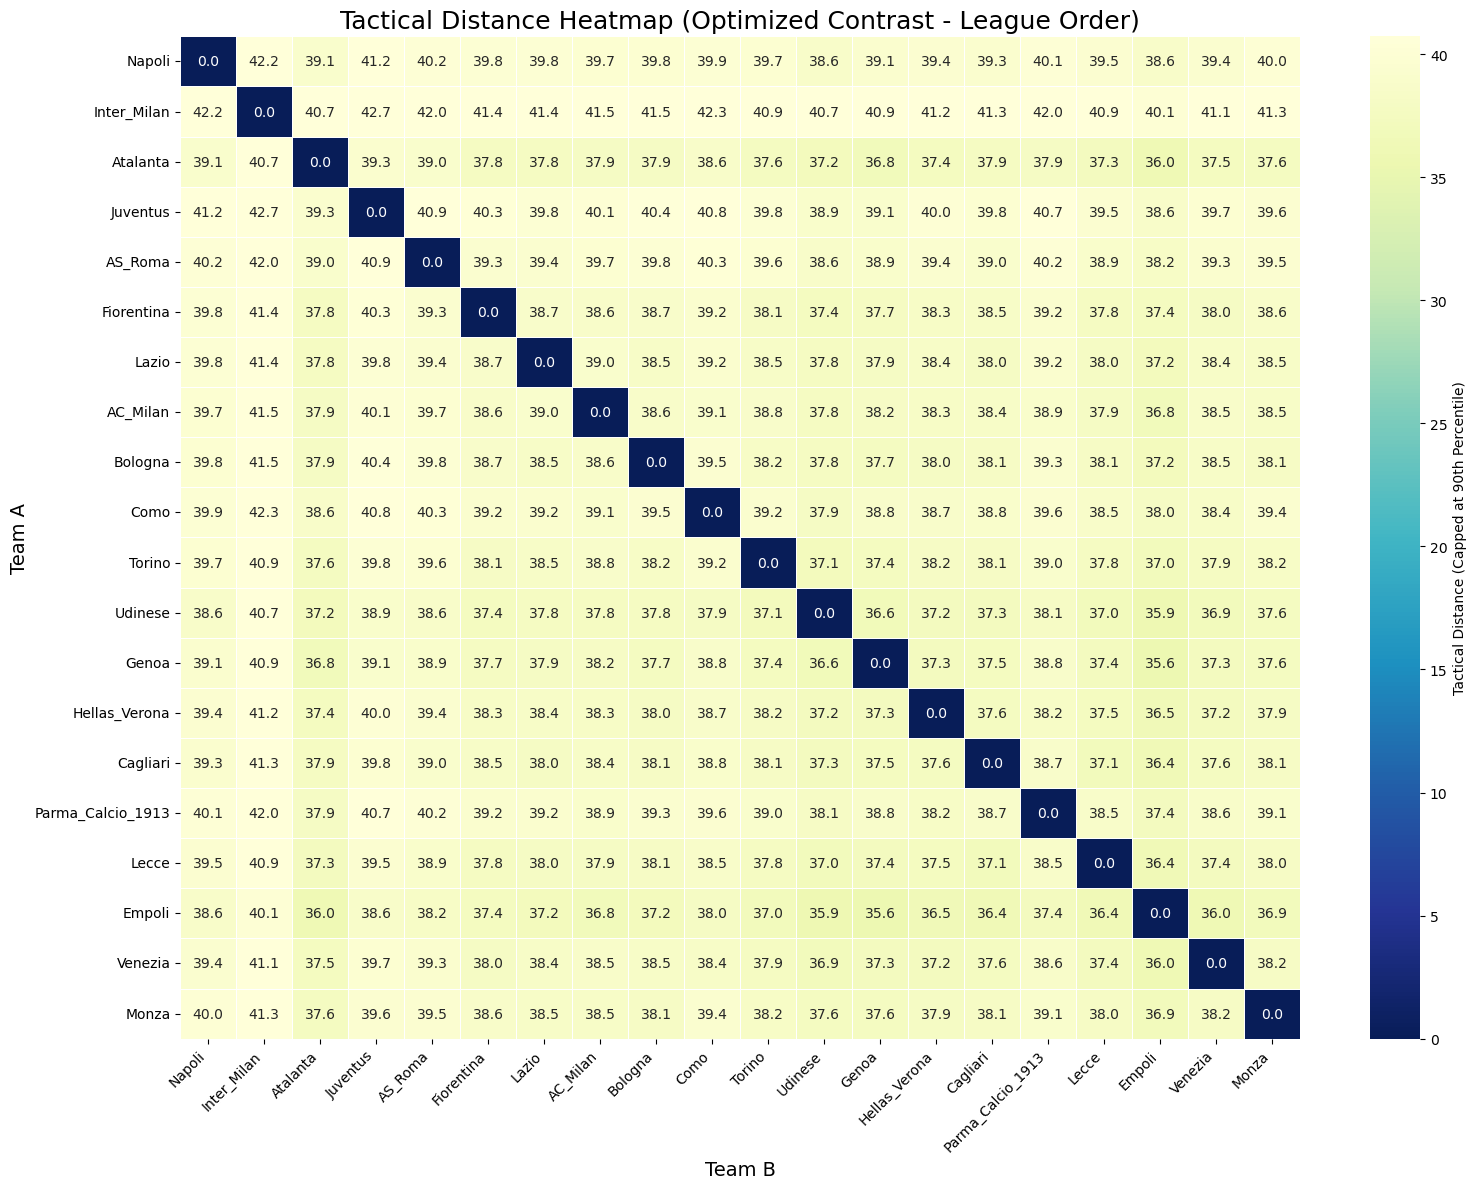

In [8]:
# 1. Load the tactical vectors
input_file = 'team_inverse_frequency_vectors.csv'

try:
    df_vectors = pd.read_csv(input_file)
    df_vectors.set_index('Team', inplace=True)

    # 2. Define the League Ranking order
    league_ranking = [
        "Napoli", "Inter_Milan", "Atalanta", "Juventus", "AS_Roma",
        "Fiorentina", "Lazio", "AC_Milan", "Bologna", "Como",
        "Torino", "Udinese", "Genoa", "Hellas_Verona", "Cagliari",
        "Parma_Calcio_1913", "Lecce", "Empoli", "Venezia", "Monza"
    ]

    available_ranking = [team for team in league_ranking if team in df_vectors.index]
    df_ordered = df_vectors.loc[available_ranking]

    # 3. Calculate Distance Matrix (Euclidean)
    distances = pdist(df_ordered.values, metric='euclidean')
    distance_matrix = squareform(distances)
    heatmap_data = pd.DataFrame(distance_matrix, index=available_ranking, columns=available_ranking)

    # 4. Color Scale Optimization
    # We calculate the 90th percentile to set a maximum threshold for colors.
    # This prevents extreme outliers from washing out the differences between similar teams.
    v_max = np.percentile(distance_matrix, 90) 

    # 5. Enhanced Visualization
    plt.figure(figsize=(16, 12))
    
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".1f", 
        cmap="YlGnBu_r", 
        linewidths=.5,
        vmax=v_max,          # Cap the color scale at the 90th percentile
        robust=True,         # Automatically ignores extreme outliers for color mapping
        cbar_kws={'label': 'Tactical Distance (Capped at 90th Percentile)'}
    )

    plt.title("Tactical Distance Heatmap (Optimized Contrast - League Order)", fontsize=18)
    plt.xlabel("Team B", fontsize=14)
    plt.ylabel("Team A", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {e}")